# Projeto 1 - Ciência dos Dados

Nome: Lívia Sayuri Makuta.

Nome: Bernardo Cunha Capoferri

Nome: Henrique Martinelli Frezzatti 

**Atenção:** Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

**Em `filename`, coloque o nome do seu arquivo de dados!**

In [2]:
import os

filename = 'coca_cola_copia.xlsx'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com a prova!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo coca_cola_copia.xlsx, tudo certo para prosseguir com a prova!


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [3]:
train = pd.read_excel(filename)
train.head(5)

,Treinamento,CATEGORIAS_1,(0: irrelevante ; 1: relevante ; 2: muito relevante)
0,"coisas inúteis sobre mim\naltura — 1,72\nidade...",2,NaN
1,"coisas inúteis sobre mim\naltura — 1,55\nidade...",2,NaN
2,@jihycoid coca-cola?kkkk,0,NaN
3,"rt @eholuan: só bebo coca cola agr, espero q m...",1,NaN
4,rt @ferrg__: já dizia meu irmão marco antônio ...,1,NaN


In [4]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,CATEGORIAS_2,(0: irrelevante ; 1: relevante ; 2: muito relevante)
0,@liegloss @thomzxx a coca-cola não me chama ne...,0,NaN
1,tomando coca cola 6hrs da manhã ao invés de to...,1,NaN
2,"coisas inúteis sobre mim\naltura — 1,56\nidade...",2,NaN
3,rt @_samirars: estou com uma vontade imensa de...,1,NaN
4,@themethodic fui ver aqui e 1 pacotinho desse ...,0,NaN


In [5]:
#mudança de variáveis quantitativas para categorias
test['CATEGORIAS_2'] = test['CATEGORIAS_2'].astype('category')
train['CATEGORIAS_1'] = train['CATEGORIAS_1'].astype('category')

test.CATEGORIAS_2.cat.categories = ['Irrelevante','Relevante','Muito relevante']
train.CATEGORIAS_1.cat.categories = ['Irrelevante','Relevante','Muito relevante']

test.CATEGORIAS_2= pd.Categorical(test.CATEGORIAS_2, categories=['Irrelevante','Relevante','Muito relevante'], ordered=True)
train.CATEGORIAS_1= pd.Categorical(train.CATEGORIAS_1, categories=['Irrelevante','Relevante','Muito relevante'], ordered=True)


train.head()

,Treinamento,CATEGORIAS_1,(0: irrelevante ; 1: relevante ; 2: muito relevante)
0,"coisas inúteis sobre mim\naltura — 1,72\nidade...",Muito relevante,NaN
1,"coisas inúteis sobre mim\naltura — 1,55\nidade...",Muito relevante,NaN
2,@jihycoid coca-cola?kkkk,Irrelevante,NaN
3,"rt @eholuan: só bebo coca cola agr, espero q m...",Relevante,NaN
4,rt @ferrg__: já dizia meu irmão marco antônio ...,Relevante,NaN


___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

O produto escolhido foi a bebida coca-cola, sendo assim outros produtos da marca não foram considerados. 
Para separar os tweets entre relevante, irrelevante e muito relevante, levamos em consideração se o tweet falava explicitamente sobre o gosto da pessoa por coca-cola. 

Dessa forma, o tweet seria considerado muito relevante se, por exemplo, falasse: "amo coca-cola", "minha bebida favorita é coca-cola" ou "coca cola é horrível", sendo portanto, tanto comentários positivos quanto negativos, desde que trouxessem informações explícitas sobre o gosto pessoal do usuário em relação à bebida.

Por sua vez, consideramos apenas relevante tweets que citavam coca-cola com outras coisas ou que não falavam explicitamente sobre o gosto pessoal do autor do tweet em relação à coca-cola, bem como mostravam vontades momentâneas que poderiam ser em alguns casos inclusive consideradas "brincadeiras", como por exemplo: "pão com coca-cola", "vontade de encher a cara de coca", "estou sofrendo, vou tomar coca" , "suco natural pisa na coca".

Por fim, consideramos irrelevantes tweets que citavam coca-cola em uma expressão ou que estavam muito pouco relacionados com o fato dos autores da mensagem gostarem ou não da bebida, por exemplo: "se acha a última coca-cola do deserto", "ontem fui no mercado e me assustei com o preço da coca-cola", "chinelo da coca".        

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [6]:
#limpando os DataFrames tanto treinamento, quanto teste, e juntando os espaçamentos que restaram. 
import re 



spec_chars = ["!","—"," "'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","kkkkkkkkkkkkk","j8l9rfxlzm","https t co pom5f4bfi4","0wfmxcndfp"]

for char in spec_chars:
    train['Treinamento'] = train['Treinamento'].str.replace(char, ' ')
    train['Treinamento'] = train['Treinamento'].str.split().str.join(" ")
    test['Teste'] = test['Teste'].str.replace(char, ' ')
    test['Teste'] = test['Teste'].str.split().str.join(" ")
    




In [7]:
#Transformando os DataFrames de treinamento e teste em listas de tweets.

LISTA_TREINAMENTO= list(train.Treinamento)
LISTA_TESTE = list(test.Teste)


#Transformando as categorias (muito relevante, relevante e irrelevante) dos DataFrames em 
#listas de tweets.

#filtrando o DataFrame por categoria.
Muito_relevante = (train['CATEGORIAS_1'] == 'Muito relevante')
filtro_muito_relevante = train.loc[Muito_relevante,:]

Relevante = train['CATEGORIAS_1'] == 'Relevante'
filtro_relevante = train.loc[Relevante,:]

Irrelevante = train['CATEGORIAS_1'] == 'Irrelevante'
filtro_irrelevante = train.loc[Irrelevante,:]


#Efetivamente transformando cada categoria do DataFrame em lista de tweets.
LISTA_TREINAMENTO_MUITO_RELEVANTE = list(filtro_muito_relevante.Treinamento)

LISTA_TREINAMENTO_RELEVANTE = list(filtro_relevante.Treinamento)

LISTA_TREINAMENTO_IRRELEVANTE = list(filtro_irrelevante.Treinamento)


In [8]:
LISTA_TESTE #testando a lista de tweets da lista teste com todas as categorias juntas.

['liegloss thomzxx a coca cola não me chama nem pra trabalhar pra eles eu acho isso injusto',
 'tomando coca cola 6hrs da manhã ao invés de tomar água dps pgnt pq dou infecção urinária',
 'coisas inúteis sobre mim altura 1 56 idade 18 tamanho do pé 34 signo câncer tatuagens 1 piercing 2 cor fav amarelo série fav grey’s animal fav dog comida fav lanche podrão bebida fav coca cola com gelo e limão https t co',
 'rt samirars estou com uma vontade imensa de beber coca cola 😣',
 'themethodic fui ver aqui e 1 pacotinho desse é o equivalente a 100 latas de coca cola em quantidade de sódio kk morri',
 'coisas inúteis sobre mim altura 1 82 não sei ao certo tamanho do pé 42 43 signo capricórnio tatuagens 0 😭 piercing 0 cor fav preto série fav supernatural animal fav gato e cachorro comida fav feijoada bebida fav coca cola',
 'gocosta12 ivokleber nós estados unidos a pepsi faz comercial usando a imagem da própria coca cola de forma depreciativa a lei lá tá cagando pra isso',
 'coisas inúteis sobr

In [9]:
#Transformando as listas de tweets em listas de palavras.

#lista teste de tweets (geral) separada em palavras. 
lista_teste=[]
for linha in LISTA_TESTE:
    linha_nova = linha.split()
    for palavra in linha_nova:
        lista_teste.append(palavra)


#lista treinamento de tweets (geral) separada em palavras. 
lista_treinamento=[]
for linha in LISTA_TREINAMENTO:
    linha_nova = linha.split()
    for palavra in linha_nova:
        lista_treinamento.append(palavra)


#lista treinamento de tweets da categoria muito relevante separada em palavras. 
lista_treinamento_muito_relevante=[]
for linha in LISTA_TREINAMENTO_MUITO_RELEVANTE:
    linha_nova = linha.split()
    for palavra in linha_nova:
        lista_treinamento_muito_relevante.append(palavra)


#lista treinamento de tweets da categoria relevante separada em palavras.
lista_treinamento_relevante=[]
for linha in LISTA_TREINAMENTO_RELEVANTE:
    linha_nova = linha.split()
    for palavra in linha_nova:
        lista_treinamento_relevante.append(palavra)


#lista treinamento de tweets da categoria irrelevante separada em palavras.
lista_treinamento_irrelevante=[]
for linha in LISTA_TREINAMENTO_IRRELEVANTE:
    linha_nova = linha.split()
    for palavra in linha_nova:
        lista_treinamento_irrelevante.append(palavra)




In [10]:
#tirando as repetições da lista de treinamento geral.
lista_treinamento_sem_rep = []

for palavra in lista_treinamento:
    if not palavra in lista_treinamento_sem_rep:
        lista_treinamento_sem_rep.append(palavra)
        

#tirando as repetições da lista teste geral.        
lista_teste_sem_rep = []

for palavra in lista_teste:
    if not palavra in lista_teste_sem_rep:
        lista_teste_sem_rep.append(palavra)
        

In [11]:
#Transformando as listas de palavrs em Pd.series para poder utilizar a função value_counts.
serie_treinamento = pd.Series(lista_treinamento)
serie_teste = pd.Series(lista_teste)
serie_treinamento_muito_relevante = pd.Series(lista_treinamento_muito_relevante)
serie_treinamento_relevante = pd.Series(lista_treinamento_relevante)
serie_treinamento_irrelevante = pd.Series(lista_treinamento_irrelevante)

#Calculando frequências absolutas dos Pd.series. 
tabela_absoluta = serie_treinamento.value_counts()
tabela_absoluta_muito_relevante = serie_treinamento_muito_relevante.value_counts()
tabela_absoluta_relevante = serie_treinamento_relevante.value_counts()
tabela_absoluta_irrelevante = serie_treinamento_irrelevante.value_counts()


serie_treinamento_muito_relevante.value_counts()


fav           1040
cola           269
coca           267
1              243
0              222
              ... 
anos             1
isso             1
a2ciyygqsj       1
6mw7e5bhwz       1
rebels           1
Length: 1261, dtype: int64

In [12]:
#definindo o numero de La Place
lp = 1

#definindo função que categoriza os tweets.
def calcula_relacoes(tabela, lista_treino):
    
    #criando dicionario de ocorrencias de palavras para as categorias.
    dicionario_palavras_ocorrencias={}
    for palavra, valor in tabela.items():
        dicionario_palavras_ocorrencias[palavra]=valor

    #aplicando a técnica smoothing laplace no categorizador e criando dicionario de relação da palavra
    #com a categoria analisada.
    dic_relacao = {}
    for palavra in lista_teste_sem_rep:
        if palavra in lista_treino:
            ocorrencias_palavra = dicionario_palavras_ocorrencias[palavra] 
            total_palavras_relevancia = len(lista_treinamento)
            total_palavras = len(tabela_absoluta)
            relacao = (ocorrencias_palavra + lp)/(total_palavras+(lp*total_palavras_relevancia))
            dic_relacao[palavra] = relacao
        else:
            ocorrencias_palavra = 0
            total_palavras_relevancia = len(lista_treinamento)
            total_palavras = len(tabela_absoluta)
            relacao = (ocorrencias_palavra + lp)/(total_palavras+(lp*total_palavras_relevancia))
            dic_relacao[palavra] = relacao
    return dic_relacao

#achando a relação das palavras em cada categoria com os dados do treinamento, com o objetivo de usar 
#essas relações para classificar os tweets dos dados de teste.
dic_m_r = calcula_relacoes(tabela_absoluta_muito_relevante, lista_treinamento_muito_relevante)

dic_r= calcula_relacoes(tabela_absoluta_relevante, lista_treinamento_relevante)

dic_ir= calcula_relacoes(tabela_absoluta_irrelevante, lista_treinamento_irrelevante)


In [13]:
print(dic_m_r) #testando relação de palavras do categorizador 

{'liegloss': 4.422234997567771e-05, 'thomzxx': 4.422234997567771e-05, 'a': 0.001061336399416265, 'coca': 0.011851589793481625, 'cola': 0.01194003449343298, 'não': 0.001813116349002786, 'me': 0.00030955644982974393, 'chama': 4.422234997567771e-05, 'nem': 0.00039800114978109935, 'pra': 0.00030955644982974393, 'trabalhar': 4.422234997567771e-05, 'eles': 4.422234997567771e-05, 'eu': 0.0017246716490514305, 'acho': 0.0005306681997081325, 'isso': 8.844469995135542e-05, 'injusto': 4.422234997567771e-05, 'tomando': 4.422234997567771e-05, '6hrs': 4.422234997567771e-05, 'da': 0.00030955644982974393, 'manhã': 4.422234997567771e-05, 'ao': 8.844469995135542e-05, 'invés': 4.422234997567771e-05, 'de': 0.0035377879980542167, 'tomar': 0.00035377879980542167, 'água': 0.0004422234997567771, 'dps': 8.844469995135542e-05, 'pgnt': 4.422234997567771e-05, 'pq': 0.00030955644982974393, 'dou': 4.422234997567771e-05, 'infecção': 4.422234997567771e-05, 'urinária': 4.422234997567771e-05, 'coisas': 0.008402246495378

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [14]:
p_geral_m_r = (266/799) #total de tweets muito relevantes/ total de tweets de treinamento.
p_geral_r = (206/799) #total de tweets relevante/ total de tweets de treinamento.
p_geral_ir = (327/799) #total de tweets irrelevantes/ total de tweets de treinamento.

#categorizando de fato os tweets do teste e comparando as probabilidades.
for sentence in test['Teste']:
    prob_m_r = 1
    prob_r = 1
    prob_ir = 1
    for palavra in sentence.split(): 
        prob_ir *= dic_ir[palavra] 
        prob_r *= dic_r[palavra] 
        prob_m_r *= dic_m_r[palavra]
    prob_ir*= p_geral_ir   
    prob_r *= p_geral_r
    prob_m_r *= p_geral_m_r
    print(prob_ir)
    print(prob_r)
    print(prob_m_r)
    print('------end-------')
    #testando a classificação por print
    if (prob_ir > prob_m_r and prob_ir > prob_r):    
        test.loc[(test.Teste== sentence),'Bayes_relevancia'] = 'Irrelevante'
        print('estoy irrelevante')
    if (prob_r > prob_m_r and prob_r > prob_ir):
        test.loc[(test.Teste== sentence),'Bayes_relevancia'] = 'Relevante'
        print('estoy relevante')     
    if (prob_m_r > prob_r and prob_m_r > prob_ir):
        test.loc[(test.Teste== sentence),'Bayes_relevancia'] = 'Muito relevante'
        print('estoy mucho relevante')






2.952840886200513e-54
8.171035715700753e-58
6.479655038206924e-61
------end-------
estoy irrelevante
3.7069521039539364e-59
7.686045208704316e-62
2.8587774935202785e-64
------end-------
estoy irrelevante
1.6597567796403598e-152
5.7890959898484116e-154
1.6881994644694348e-104
------end-------
estoy mucho relevante
5.072819695894659e-39
5.0057738927699066e-39
1.8318941615246598e-40
------end-------
estoy irrelevante
1.970025224733861e-76
6.195362015804247e-81
4.553853329423787e-82
------end-------
estoy irrelevante
4.941553707788291e-149
1.0558028814604293e-150
2.638813082552312e-100
------end-------
estoy mucho relevante
8.48700812967442e-92
2.618950557426305e-96
1.5337044767523933e-99
------end-------
estoy irrelevante
2.1766760384821784e-181
1.0597261744033839e-182
8.157491503830069e-122
------end-------
estoy mucho relevante
1.8733564013260965e-84
3.4025442432465696e-87
1.4372448804575667e-90
------end-------
estoy irrelevante
6.3701506678665785e-74
3.572777796641012e-75
3.0999945701

estoy irrelevante
3.7054018301949764e-166
2.5198651436629175e-166
8.037401151466842e-116
------end-------
estoy mucho relevante
3.32864376142899e-40
4.7514084996553184e-42
4.496918531914618e-45
------end-------
estoy irrelevante
2.8439450437127464e-61
3.5974422576910294e-66
1.7789484215166594e-69
------end-------
estoy irrelevante
2.4623586294191226e-25
3.4596830209455075e-25
1.5785050208582578e-26
------end-------
estoy relevante
2.879880947193257e-42
6.508580564901682e-44
1.528525639433963e-46
------end-------
estoy irrelevante
2.4191281230638252e-40
1.8051177936042717e-42
8.74486585121581e-44
------end-------
estoy irrelevante
2.5545071605564778e-33
8.279840217383271e-36
2.8698988742026985e-36
------end-------
estoy irrelevante
6.270250419614876e-43
6.335759116242993e-44
1.2416075703076838e-43
------end-------
estoy irrelevante
1.6986035167130757e-43
1.549787264477599e-44
2.4421087159443873e-47
------end-------
estoy irrelevante
4.113399149376213e-20
3.330265441193141e-21
1.08359014

estoy irrelevante
4.8702899681756255e-120
3.2186323510426345e-129
2.0609671296186454e-127
------end-------
estoy irrelevante
2.5037352174893647e-175
2.4289586246184557e-178
5.786365727658808e-119
------end-------
estoy mucho relevante
1.0910423861762707e-92
3.43743360345166e-95
1.7813102270940904e-98
------end-------
estoy irrelevante
1.6699454477841676e-77
5.910833129373644e-79
1.6403320298417513e-83
------end-------
estoy irrelevante
2.301820306287872e-63
1.7812586565589887e-66
2.1362714102821392e-66
------end-------
estoy irrelevante
2.4612488051168067e-186
8.877404132895742e-188
5.726214128239865e-133
------end-------
estoy mucho relevante
2.6731838647389116e-191
1.5058141061076345e-191
9.408795905746881e-136
------end-------
estoy mucho relevante
3.379777945478589e-176
2.5904627859656993e-178
2.133978863334161e-123
------end-------
estoy mucho relevante
2.3637058745608633e-51
1.0289439458192364e-53
9.364367565346815e-59
------end-------
estoy irrelevante
3.404752593560945e-59
6.12

estoy irrelevante
2.136335731692598e-178
1.1886700387789538e-178
1.6435088597148648e-122
------end-------
estoy mucho relevante
1.037292075481729e-44
2.5949022390953253e-46
8.941495970947287e-43
------end-------
estoy mucho relevante
3.548392125084342e-184
5.78934309264147e-193
1.0316977557669142e-198
------end-------
estoy irrelevante
3.987820483277377e-39
2.7786954576872476e-41
4.1369942296136323e-41
------end-------
estoy irrelevante
1.810743517645887e-39
2.8177079593504457e-41
1.0775848008968587e-43
------end-------
estoy irrelevante
4.552342965568317e-88
7.468181516815948e-97
2.3433226127902937e-104
------end-------
estoy irrelevante
2.87928198769344e-167
1.5239010293912383e-168
2.1294227362460034e-114
------end-------
estoy mucho relevante
3.0699054241183743e-140
6.038756140432948e-146
2.3041873253802884e-150
------end-------
estoy irrelevante
2.5205440187596443e-41
5.466892516604001e-45
9.571069141965846e-43
------end-------
estoy irrelevante
1.9823144590789053e-59
5.96189133504

In [15]:
test['Bayes_relevancia'] = test['Bayes_relevancia'].astype('category')
#test.Bayes_relevancia.cat.categories = ['Irrelevante','Relevante','Muito relevante']
test.Bayes_relevancia= pd.Categorical(test.Bayes_relevancia, categories=['Irrelevante','Relevante','Muito relevante'], ordered=True)

In [16]:
#primeiro print do value counts absoluto da classificação por Naive_bayes
print(test.Bayes_relevancia.value_counts().sort_index())

#segundo print do value counts absoluto da classificação feita por nós
print(test.CATEGORIAS_2.value_counts())    

Irrelevante        198
Relevante           13
Muito relevante     64
Name: Bayes_relevancia, dtype: int64
Irrelevante        114
Relevante           87
Muito relevante     74
Name: CATEGORIAS_2, dtype: int64


In [17]:
test.head(10) #testando a nova coluna criada para os 10 primeiros elementos.

,Teste,CATEGORIAS_2,(0: irrelevante ; 1: relevante ; 2: muito relevante),Bayes_relevancia
0,liegloss thomzxx a coca cola não me chama nem ...,Irrelevante,NaN,Irrelevante
1,tomando coca cola 6hrs da manhã ao invés de to...,Relevante,NaN,Irrelevante
2,coisas inúteis sobre mim altura 1 56 idade 18 ...,Muito relevante,NaN,Muito relevante
3,rt samirars estou com uma vontade imensa de be...,Relevante,NaN,Irrelevante
4,themethodic fui ver aqui e 1 pacotinho desse é...,Irrelevante,NaN,Irrelevante
5,coisas inúteis sobre mim altura 1 82 não sei a...,Muito relevante,NaN,Muito relevante
6,gocosta12 ivokleber nós estados unidos a pepsi...,Irrelevante,NaN,Irrelevante
7,coisas inúteis sobre mim altura 1 69 idade 23 ...,Muito relevante,NaN,Muito relevante
8,annapierrey couto gtd mano mamão já é doce pra...,Irrelevante,NaN,Irrelevante
9,caco filho nunca vi um ser humano tomar tanta ...,Relevante,NaN,Irrelevante


In [18]:
#Comparação entre os valores absolutos que foram classificados como irrelevantes, relevantes, e muito
#relevantes. Por exemplo: separamos apenas os tweets irrelevantes que tinhamos classificado na mão para compara em 
#como o classificador classificou esses tweets irrelevantes.

filtro_categorias2= test['CATEGORIAS_2'] == "Irrelevante"
Irrelevantess = test.loc[filtro_categorias2,:]
print(Irrelevantess.Bayes_relevancia.value_counts().sort_index())
print(Irrelevantess.CATEGORIAS_2.value_counts().sort_index())

print('--------------------------------------')

filtro_categorias3= test['CATEGORIAS_2'] == "Relevante"
Relevantess = test.loc[filtro_categorias3,:]
print(Relevantess.Bayes_relevancia.value_counts().sort_index())
print(Relevantess.CATEGORIAS_2.value_counts().sort_index())

print('--------------------------------------')

filtro_categorias4= test['CATEGORIAS_2'] == "Muito relevante"
M_relevantess = test.loc[filtro_categorias4,:]
print(M_relevantess.Bayes_relevancia.value_counts().sort_index())
print(M_relevantess.CATEGORIAS_2.value_counts().sort_index())



Irrelevante        109
Relevante            1
Muito relevante      4
Name: Bayes_relevancia, dtype: int64
Irrelevante        114
Relevante            0
Muito relevante      0
Name: CATEGORIAS_2, dtype: int64
--------------------------------------
Irrelevante        72
Relevante          11
Muito relevante     4
Name: Bayes_relevancia, dtype: int64
Irrelevante         0
Relevante          87
Muito relevante     0
Name: CATEGORIAS_2, dtype: int64
--------------------------------------
Irrelevante        17
Relevante           1
Muito relevante    56
Name: Bayes_relevancia, dtype: int64
Irrelevante         0
Relevante           0
Muito relevante    74
Name: CATEGORIAS_2, dtype: int64


___
### Concluindo

In [19]:
#realizando o crosstab para saber a relação entre a classificação feita por Naive-Bayes e por nós.
pd.crosstab( test['CATEGORIAS_2'],test['Bayes_relevancia'],normalize='index',margins=True).round(2)*100

Bayes_relevancia,Irrelevante,Relevante,Muito relevante
CATEGORIAS_2,,,
Irrelevante,96.0,1.0,4.0
Relevante,83.0,13.0,5.0
Muito relevante,23.0,1.0,76.0
All,72.0,5.0,23.0


In [20]:
#realizando o crosstab com o normalize = True para saber o desempenho do categorizador.

print('A acurácia do sistema é: 40+4+20 = 64% (aproximadamente)')
pd.crosstab(test['Bayes_relevancia'], test['CATEGORIAS_2'],normalize=True).round(2)*100

A acurácia do sistema é: 40+4+20 = 64% (aproximadamente)


CATEGORIAS_2,Irrelevante,Relevante,Muito relevante
Bayes_relevancia,,,
Irrelevante,40.0,26.0,6.0
Relevante,0.0,4.0,0.0
Muito relevante,1.0,1.0,20.0


In [21]:
#Verdadeiros positivos: Irrelevante:
Verdadeiro_posit_ir = 96
print('O verdadeiro positivo dos tweets irrelevantes é: {0}%'.format(Verdadeiro_posit_ir))

#Verdadeiros positivos: Relevante
Verdadeiro_posit_r = 13
print('O verdadeiro positivo dos tweets relevantes é: {0}%'.format(Verdadeiro_posit_r))

#Verdadeiros positivos: Muito relevante
Verdadeiro_posit_m_r = 76
print('O verdadeiro positivo dos tweets muito relevantes é: {0}%'.format(Verdadeiro_posit_m_r))

print('_______________________________________________________________________')

#Falsos positivos: Irrelevante:
Falso_posit_ir = 5
print('O falso positivo dos tweets irrelevantes é: {0}%'.format(Falso_posit_ir))

#Falsos positivos: Relevante
Falso_posit_r = 88
print('O falso positivo dos tweets relevantes é: {0}%'.format(Falso_posit_r))

#Falsos positivos: Muito relevante
Falso_posit_m_r = 24
print('O falso positivo dos tweets muito relevantes é: {0}%'.format(Falso_posit_m_r))




O verdadeiro positivo dos tweets irrelevantes é: 96%
O verdadeiro positivo dos tweets relevantes é: 13%
O verdadeiro positivo dos tweets muito relevantes é: 76%
_______________________________________________________________________
O falso positivo dos tweets irrelevantes é: 5%
O falso positivo dos tweets relevantes é: 88%
O falso positivo dos tweets muito relevantes é: 24%


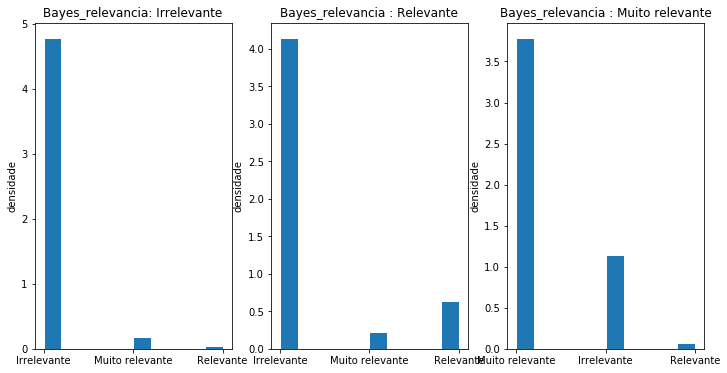

In [22]:
#Construindo gráficos de dispersão entre as categorias do Naive_Bayes e os dados que classificamos.

plt.figure(figsize=(12, 6))

plt.subplot(1,3,1)
plt.hist(Irrelevantess.Bayes_relevancia, edgecolor='white',density=True)
plt.title('Bayes_relevancia: Irrelevante')
plt.ylabel('densidade')

plt.subplot(1,3,2)
plt.hist(Relevantess.Bayes_relevancia, edgecolor='white', density=True)
plt.title('Bayes_relevancia : Relevante')
plt.ylabel('densidade')

plt.subplot(1,3,3)
plt.hist(M_relevantess.Bayes_relevancia, edgecolor='white', density=True)
plt.title('Bayes_relevancia : Muito relevante')
plt.ylabel('densidade')

plt.show()

**Como são classificadas mensagens com sarcasmo e outros cenários para Naive-Bayes**

O classificador que criamos não consegue identificar expressões, sarcasmo entre outras figuras de linguagem. Ele apenas leva em consideração o aspecto quantitativo das palavras, e não a semântica. Sendo assim, mensagens que na verdade utilizam "coca-cola" como uma expressão como : "a última coca-cola do deserto", podem ser classificadas como relevantes, quando na verdade são irrelevantes.   

Olhando o modelo, da forma com que foi apresentado, ou seja, sem utilizar técnicas mais avençadas de precisão, pode-se assumir que a classificação feita por Naive-Bayes é válida, mas não garante sempre uma classificação fiel. Dessa forma, é de se pensar em cenários ou situações que sejam melhores e mais propícios para se utilizar esse processo.  Com o modelo mais simples que utilizamos, pode-se pensar por exemplo, em relações de fatos que já aconteceram no passado, como por exemplo a relação entre classes de viagem e número de sobreviventes no Titanic. Como são fatos que já ocorreram no passado, um resultado não muito preciso não acarretaria em grandes consequências, embora pudesse indicar relações erradas e superficiais. 

Agora, utilizando técnicas mais avançadas em conjunto com o classificador Naive-Bayes, podem-se propor vários cenários, isso porque para começar, esse classificador tem aprendizagem rápida, o que é muito bom para precisões em tempo real. Por sua vez, por ter uma funcionalidade de previsão de multi-casses pode-se ser também utilizado para fazer previsões multi-classes. Dessa forma, podemos pensar por exemplo, na probabilidade de uma pessoa que realizou um teste de determinada doença realmente possuir a doença se recebeu um resultado positivo. Ainda, um ótimo exemplo onde Naive- Bayes é utilizado, é na filtragem de spam, ou seja, identificar quando uma mensagem recebida é ou não uma mensagem pouco interessante para o usuário que a recebeu. Por fim, esse classificador também pode ser usado em sistemas de recomendação, que utilizam de técnicas 'machine learning' e mineração de dados para prever se um usuário gostaria de um determinado recurso ou não.


**Por que não posso alimentar minha base de Treinamento automaticamente usando o próprio classificador, aplicado a novos tweets?**

Não é possível alimentar a base de Treinamento automaticamente usando o próprio classificador, pois a base de Treinamento é composta pelos tweets que nós classificamos à mão para que o categorizador através de probabilidades e estatística dessa base pudesse aprender e só então classificar novos tweets. Dessa forma, não faz sentido alimentar a base de Treinamento usando o próprio classificador, até porque os resultados obtidos pelo classificador nem sempre contam com grande precisão, o que poderia no fim influenciar o próprio classificador a como classificar os tweets, tornando-se uma classificação enviesada. 

Portanto, a base de treinamento é feita para o classificador aprender a classificar, além de que os resultador do categorizador não podem ser utilizados para a máquina aprender. Isso porque pode criar vieses no classificador, bem como influenciar na precisão final dos dados que estão sendo analisados. 

**Proposições e melhorias para o modelo adotado**

Primeiro para a melhor acurácia dos dados, os tweets poderiam ter sido limpados de uma maneira a excluir links, gifs ou imagens, nomes de usuários, além de expressões virtuais como risadas. Ademais, para melhorar ainda mais a limpeza dos dados, algumas palavras que não têm tanta importância em termos semânticos como "a", "de", entre outras podiam também ser eliminadas. A primeira parte, para eliminar alguns dados muito pouco relevantes, chamados de "outliers", poderia ser feita através da visualização de suas ocorrências, já que muitas delas, principalmente links têm um número de ocorrências muito baixo. A partir disso, poderia ser feita uma limitação mínima de ocorrências para a seleção dos dados. Já em relação a parte semântica, para a eliminação das "stopwords" ou "palavras vazias", podem ser utilizados listas de stopwors disponíveis na internet, ou dependendo do trabalho realizado, pode ser feita manualmente uma lista que atenda ao propósito específico que está sendo trabalhado. Com essa lista em mãos, baste pedir para o "Python" eliminar essas palavras da base de dados que está sendo analisada. 

Em relação a palavras flexionadas, como por exemplo, "beber", "bebida", "bebeu" e suas variações, essas poderiam ser contabilizadas em no mesmo grupo de ocorrências, já que por conta dessas flexões o programa pode entender que são palavras completamente diferentes, o que pode atrapalhar na interpretação de dados e como consequência classificar um dado como irrelevante, quando esse deveria ser relevante. Para realizar essa redução de léxico, existem algumas técnicas que se destacam como o "Stemming" e a "Seleção de Características". O Stemming encontra a raiz da palavra e na maioria das vezes, elimina os prefixos e sufixos que indicam variação na forma da palavra, como tempos verbais ou plural, o que embora aumente a precisão da análise também tem os seus problemas, já que palavras como "novamente" e "novo" podem se reduzir ao mesmo termo "nov", mesmo sendo diferentes. Para melhorar ainda mais essa redução lexical, pode ser feita então a seleção de características, que se utiliza de filtros que selecionam os termos mais representativos no conjunto de características, para com isso chegar em um número de "Ganho de Informação", que é um algoritmo que qualifica atributos dos dados obtido através da medição de um peso para cada um deles. Esse processo conta com fórmulas matemáticas e ferramentas estatísticas que aumentam a precisão de acerto da análise feita.  

Por fim, outra melhoria na parte semântica que poderia acarretar uma melhor performance para o nosso modelo, seria ao invés de contabilizar palavras, contabilizar sequências de palavras como "vontade de beber" e " bebida favorita". Outrossim, ao invés de apenas contar frequências também poderíamos penalizar algumas palavras, através da técnica de frequência do termo inverso da frequência nos documentos, o que serve para estatisticamente indicar a importância de uma palavra levando em consideração também o conjunto de documentos ou o corpo linguístico. Assim, com essa técnica a importância da palavra aumenta à medida que o seu número de ocorrências também aumenta levando em consideração a frequência da palavra no corpo linguístico. Dessa forma, essa técnica considera que existem palavras mais comuns que outras, o que influencia diretamente o seu número de ocorrências e pode comprometer o resultado.  



**Por que devem financiar nosso projeto?**

Cara empresa,

Nosso projeto foi realizado sem técnicas muito avançadas, e apesar de nossos resultados não apresentarem grande precisão (embora tenha funcionado consideravelmente bem para as categorias "muito relevante" e "irrelevante") por conta dos motivos citados acima, podemos melhorar o desempenho em um maior tempo de projeto. Dessa forma, podemos por em prática as ténicas mais avançadas que propusemos: melhor limpeza de dados, redução lexical, contabilização de frequências de sequências de palavras e importância de palavras em um corpo linguístico.

Em um curto período de tempo alcançamos um resultado razoável que pode ser aperfeiçoado. Porém para uma maior precisão, precisamos de mais tempo para aperfeiçoar nossas técnicas. A estatística é um campo muito vasto e pode ser muito bem aproveitado para ajudá-los. 

Ficamos à disposição e esperamos poder contribuir para melhorar ainda mais o desempenho da companhia.

Desde já agradecemos,

Bernardo Cunha Capoferri, Lívia Sayuri Makuta, Henrique Martinelli Frezzatti.


**Fontes:** 

BRITO, Edeleon Marcelo Nunes. "Mineração de Textos: Detecção automática de sentimentos em comentários nas mídias sociais". Trabalho de mestrado em Sistemas de Informação e Gestão do Conhecimento da Universidade Fundação Mineira de Educação e Cultura —FUMEC. Disponível em: < http://www.fumec.br/revistas/sigc/article/download/3737/2034> . Acesso em: 27/09/2020. 

RIBEIRO, Lucas Braga. "Análise de sentimento em comentários sobre aplicativos para dispositivos móveis: Estudo do impacto do pré-processamento". Monografia apresentada como requisito parcial
para conclusão do Bacharelado em Ciência da Computação da Universidade de Brasília (Unb). Disponível em: <https://bdm.unb.br/bitstream/10483/11042/1/2015_LucasBragaRibeiro.pdf> . Acesso em: 27/09/2020. 

Lianne & Justin. "Data Cleaning in Python: the Ultimate Guide (2020)". Disponível em: <https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d >. Acesso em 27/09/2020.

STECANELLA, Bruno. "A practical explanation of a Naive Bayes classifier". Disponível em : <https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/>. Acesso em: 27/09/2020. 






___
## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou entre emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* Montar um dashboard que realiza análise de sentimento e visualiza estes dados

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**